## 빅데이터 실습

### COVID19, 코로나 바이러스의 영향으로 중국인 관광객 얼마나 줄었을까?

#### 데이터 수집
- 한국관광고사, [한국관광 데이터랩](https://datalab.visitkorea.or.kr/datalab/portal/main/getMainForm.do)

#### 데이터 로드 및 전처리
- 분석적 중요한 단계
- Data Preprocessing : 분석에 적합하도록 원하는 형태로 데이터를 가공과정
  - 결측치 처리(None, Null, Nan) 처리, 이상치 처리, 변수 정규화, 파생변수 생성

#### 엑셀파일 로드


In [ ]:
import pandas as pd

In [ ]:
kto_201901 = pd.read_excel('./data/kto_201901.xlsx',header=1, usecols='A:G', skipfooter=4)
kto_201901

In [ ]:
kto_201901.head()

In [ ]:
kto_201901.tail()

In [ ]:
# DF 각 정보개요
kto_201901.info()

In [ ]:
# DF의 각 통계치
kto_201901.describe()

In [ ]:
# 한번도 한국에 방문학적이 없는 대륙, 나라(목적별)
condition = (kto_201901['관광']==0) | (kto_201901['상용']==0 )| (kto_201901['공용']==0)| (kto_201901['유학/연수']==0)|(kto_201901['기타']==0)
condition

In [ ]:
kto_201901[condition]

In [ ]:
## cmap 판다스  DF 컬러맵
'''
'Accent', 'Accent_r', 'Blues', 'Blues_r', 
'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 
'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 
'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 
'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 
'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 
'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 
'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 
'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 
'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 
'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 
'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 
'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 
'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 
'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 
'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 
'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar',
'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 
'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r',
'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 
'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 
'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 
'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 
'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 
'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 
'terrain', 'terrain_r', 'turbo', 'turbo_r', 
'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'
'''
kto_201901[condition]
kto_201901.style.background_gradient(axis=None, vmin=0, vmax=200_000,cmap='gray')

In [ ]:
## 기준년월 추가
kto_201901['기준년월'] = '2019-01'
kto_201901

In [ ]:
## 국적데이터만 추출
kto_201901['국적'].unique()

In [ ]:
## 
for item in kto_201901['국적']:
    if item.strip()[-1] == '주':
        print(item)

In [ ]:
## 대륙 리스트
continent_list = ['아시아주','미주','구주','대양주','아프리카주','기타대륙','교포소계']
continent_list

In [ ]:
## 대륙을 뺀 국적리스트
condition=(kto_201901['국적'].isin(continent_list) == False)
kto_201901_countries = kto_201901[condition]
kto_201901_countries['국적'].unique()

In [ ]:
## 중간 비는 인덱스없이 다시 시정, inplace=True 기존 데이터를 대체해줌
kto_201901_countries.reset_index(drop=True, inplace=True)
kto_201901_countries

In [ ]:
## 년월별 데이터 전처리 함수
def createKtoData(yyyy,mm):
    #1. 엑셀파일 지정
    filePath = f'./data/kto_{yyyy}{mm:02d}.xlsx'
    #1. 엑셀파일 불러오기
    df = pd.read_excel(filePath, header=1,usecols='A:G',skipfooter=4)
    #2  기준년월 컬럼 추가
    df['기준년월']= f'{yyyy}-{mm:02d}'
    #3 국적컬럼 대륙제거 국가만
    ignore_list = ['아시아주','미주','구주','대양주','아프리카주','기타대륙','교포소계']
    #4 대륙제거
    condition=(df['국적'].isin(ignore_list) == False)
    df_countries = df[condition].reset_index(drop=True)
    #5 대륙 칼럼 추가
    continents = ['아시아']*25 + ['아메리카']*5 + ['유럽']*23 + ['오세아니아']*3 + ['아프리카']*2 + ['기타대륙'] + ['교포']
    df_countries['대륙'] = continents
    #6 국적별 관광객비율 컬럼추가
    df_countries['관광객비율(%)'] = round(df_countries['관광']/df_countries['계']*100,1)
    #7 전체비율 컬럼추가
    totalSum = sum(df_countries['관광'])
    df_countries['전체비율(%)'] =round(df_countries['관광']/totalSum*100,1)
    #8 결과리턴
    return(df_countries)

In [ ]:
## 테스트
df_test = createKtoData(2010,9)
df_test

#### tqdm 라이브러리

##### 프로그레스바

In [ ]:
from tqdm import tqdm
import time

In [ ]:
## 빈 DF
df_total = pd.DataFrame()

In [ ]:
for yyyy in tqdm(range(2010,2021)):
    for mm in range(1,13):
        try:
            temp = createKtoData(yyyy, mm)
            df_total = pd.concat([df_total, temp],ignore_index=True)
        except:
            pass

In [ ]:
df_total.info()

In [ ]:
## 파일저장
df_total.to_excel('./data/kto_total.xlsx', index=False)

In [ ]:
## 중국국적 데이터만 추출
condition = df_total['국적'] == '중국'
df_china=df_total[condition]
df_china

In [ ]:
df_china.info()

#### 데이터 시각화/분석

In [ ]:
df_china.reset_index(inplace = True)

In [ ]:
df_china

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font)
rcParams['axes.unicode_minus'] = False

In [ ]:
sns.set_style('darkgrid')

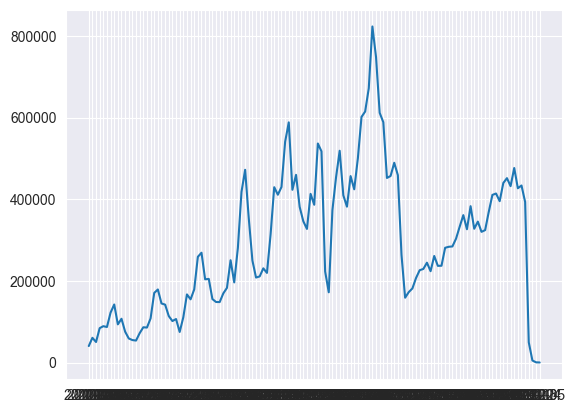

In [38]:
plt.plot(df_china['기준년월'],df_china['관광'])
plt.show()

In [ ]:
for i in range(2010,2021):
    print(f'{i}-01')

In [ ]:
# list
var1 = [f'{i}-01' for i in range(2010,2021)]

In [ ]:
import warnings
warnings.filterwarnings("ignore")


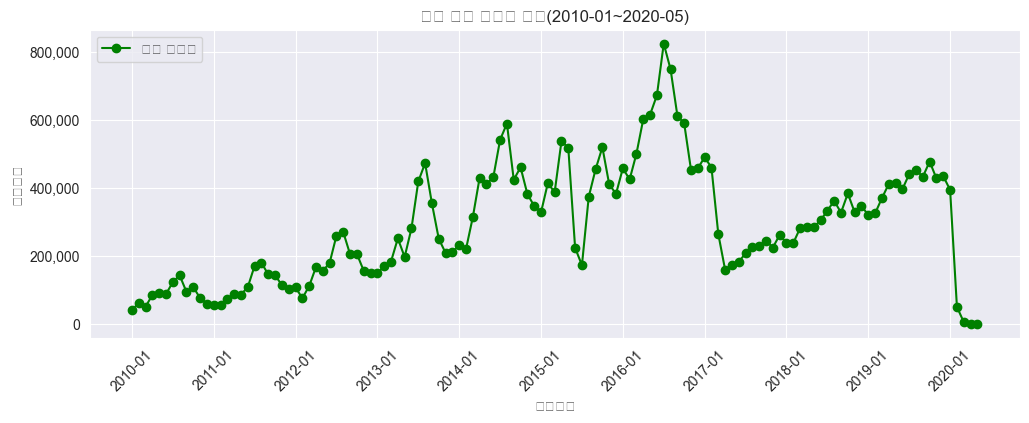

In [37]:
# 차트 크기 조절
plt.figure(figsize=(12,4))
# 그래프 내용
plt.plot(df_china['기준년월'],df_china['관광'],label = '중국 관광객', color = 'g', marker = 'o')
# 그래프 이름달기
plt.title('중국 국적 관광객 추이(2010-01~2020-05)')
plt.xlabel('기준년월')
plt.ylabel('관광객수')
plt.legend(loc='upper left')
# x 축 눈금 값 설정
plt.xticks(var1,rotation=45)
# y 축 라벨 (1000단위마다 쉼표)
plt.gca().set_yticklabels([f'{x:,.0f}'for x in plt.gca().get_yticks()])

plt.show()

In [ ]:
## 판다스 DF 을 자동으로 차트 만들어주는 것
df_china.plot()
plt.show()